In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import operator
import seaborn as sns
import pprint
from collections import OrderedDict


##   Part 1 :  Categorical Data <br>

In [2]:
# loading the data in a dataframe
# train_set and validate_set  80:20

file = 'train.csv'
df = pd.read_csv(file)
x = np.unique(df['left'], return_counts = True)

c_list = ['Work_accident','promotion_last_5years','sales','salary','left']

df1 = df[c_list]
train_set = df1.sample(frac=0.8,random_state=200)
validate_set = df1.drop(train_set.index)
x = np.unique(train_set['left'], return_counts = True)
# print(x)
c_list.remove('left')

# -------------------------------------------------------------------------------

def entropy_(df):
    total = df['left'].count()
    positive = df[df['left'] == 1]
    pos_c = positive['left'].count()
    neg_c = total - pos_c
    if pos_c == 0 or neg_c == 0 :
        return 0
    ent = - (pos_c/total * math.log(pos_c/total,2) 
                 + neg_c/total * math.log(neg_c/total,2))
    return ent
# --------------------------------------------------------------------------------- IG

def IG(data,attribute,entropy):
    isum = 0
    t = len(data.index)
    label = (data[attribute].unique()).tolist()
    for i in label:
        sdf = data[data[attribute] == i]
        isum = isum + ((len(sdf.index)/t) * entropy_(sdf))
    return entropy - isum

# --------------------------------------------------------------------------------- Best Attribute

def best_attribute(df,attribute):
    e = entropy_(df)
    attribute_list = {}
    for best in attribute :
        attribute_list[best] = IG(df , best , e)
    b = max(attribute_list, key=attribute_list.get)
    return b
# --------------------------------------------------------------------------------- tree

def tree(df , attribute_list , pd , root=None):
    if len(np.unique(df['left'])) <=1 :
        return {'predict': np.unique(df['left'])[0]}
    elif len(attribute_list) == 0:
        t = np.argmax(np.unique(df['left'], return_counts = True)[1])
        return {'predict': np.unique(df['left'])[t]}
    elif len(df) == 0:
        t = np.argmax(np.unique(pd['left'], return_counts = True)[1])
        return {'predict': np.unique(pd['left'])[t]}
    b = best_attribute(df,attribute_list[:])
    attribute_list.remove(b)
    # tree empty
    if root is None:
        root = {}
        root[b] = {}
    for i in df[b].unique():
        new_df = df[df[b]==i]
        root[b][i] = tree( new_df , attribute_list[:] , df)
    return root

# ---------------------------------------------------------------------------------

# Build Tree ------ Call the function 

root = tree(train_set,c_list[:],train_set)
# print(root)
prediction = []   # List of prediction to store a list of [ 0 ,1 ] of the predicted value on Validate Set

# --------------------------------------------------------------------------------- Compare 

def compare(row,root):
    try:
        if list(root.keys())[0] == 'predict':
            return root['predict']
        else:
            value = row[list(root.keys())[0]]
            return compare(row,root[list(root.keys())[0]][value])
    except:
        return 0            # Maximum values in DataSet is 0 so return 0 

# ---------------------------------------------------------------------------------  Test 

def test(root,df):
    for index,row in df.iterrows():
        prediction.append(compare(row,root))

        
        
# ---------------------------------------------------------------------------------  Validate Set

def final_prediction_list():
    prediction_list= OrderedDict()
    tp,fp,tn,fn = 0,0,0,0
    for i in range(len(actual)):
        if prediction[i] == actual[i]:
            if prediction[i] == 1:
                tp += 1
            elif prediction[i] == 0:
                tn += 1
        else:
            if actual[i] == 1:
                fn += 1
            elif actual[i] == 0:
                fp += 1
    prediction_list['True Positive'] = tp
    prediction_list['False Positive'] = fp
    prediction_list['True Negative'] = tn
    prediction_list['False Negative'] = fn
    accuracy = (tp+tn)/len(actual)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = 2/(1/recall + 1/precision)
    prediction_list['Accuracy'] = accuracy
    prediction_list['Precision'] = precision
    prediction_list['Recall'] = recall
    prediction_list['F1_Score'] = f1_score
    pp = pprint.PrettyPrinter(indent=6)
    for i, (key, value) in enumerate(prediction_list.items()):
        print(key + ":: ", value)
        print("")
# ---------------------------------------------------------------------------------

actual = validate_set['left'].tolist()

# test the data , call test function

test(root,validate_set)
final_prediction_list()

True Positive::  1

False Positive::  0

True Negative::  1750

False Negative::  497

Accuracy::  0.7789145907473309

Precision::  1.0

Recall::  0.002008032128514056

F1_Score::  0.004008016032064128



# Part 2 : Numerica Data included in Train_Set <br>


In [3]:
# loading the data in a dataframe
file = 'train.csv'
df = pd.read_csv(file)
x = np.unique(df['left'], return_counts = True)
c_list = ['satisfaction_level','last_evaluation','number_project','average_montly_hours',
          'time_spend_company','Work_accident','promotion_last_5years','sales','salary','left']
df1 = df[c_list]

train_set = df1.sample(frac=0.8,random_state=200)
validate_set = df1.drop(train_set.index)
x = np.unique(train_set['left'], return_counts = True)
c_list.remove('left')

# ---------------------------------------------------------------------------------

def entropy_(df):
    total = df['left'].count()
    positive = df[df['left'] == 1]
    pos_c = positive['left'].count()
    neg_c = total - pos_c
    if pos_c == 0 or neg_c == 0 :
        return 0
    ent = - (pos_c/total * math.log(pos_c/total,2) 
                 + neg_c/total * math.log(neg_c/total,2))
    return ent
    
# ---------------------------------------------------------------------------------

def IG(data,attribute,entropy):
    isum = 0
    t = len(data.index)
    label = (data[attribute].unique()).tolist()
    for i in label:
        sdf = data[data[attribute] == i]
        isum = isum + ((len(sdf.index)/t) * entropy_(sdf))
    return entropy - isum
# ---------------------------------------------------------------------------------
# best attribute

def best_attribute(df,attribute):
    e = entropy_(df)
    attribute_list = {}
    for best in attribute :
        attribute_list[best] = IG(df , best , e)
    b = max(attribute_list, key=attribute_list.get)
    return b
# ---------------------------------------------------------------------------------

numeric_data = ['satisfaction_level','last_evaluation','number_project',
                'average_montly_hours','time_spend_company']
attribute_dict = {}
# --------------------------------------------------------------------------------- 
# Preprocess the numeric data accordingly

def convert(df,attr):
    mapp = {}
    check = []
    avg = []
    label = 0
    llist = []
    sortd = df.sort_values(attr)
    uv = sortd[attr].unique().tolist()
    for i in uv:
        temp = sortd[sortd[attr] == i]
        mapp[i] = np.unique(temp['left'])[np.argmax(np.unique(temp['left'],return_counts=True)[1])]
        
    prev = uv[0]
    h = mapp[uv[0]]
    for i in uv[1:len(uv)]:
        if mapp[i] == h:
            prev =i
            continue
        else :
            h = 1-h
            check.append(prev)
            prev = i
            check.append(i)
    for i in range(0,len(check),2):
        avg.append((check[i]+check[i+1])/2)
    attribute_dict[attr] = avg
    for i in df.index:
        attv = df.loc[i,attr]
        label = 0
        f = 0
        for a in avg:
            if attv < a:
                f = 1
                llist.append(label)
                break
            else :
                label += 1
        if f == 0:
            llist.append(label)
    
    df = df.drop(attr,axis=1)           ##
    new1 = pd.Series(llist)              ##
    df[attr] = new1.values
    return df
# --------------------------------------------------------------------------------- 

def tree(df , attribute_list , pd , root=None):
    if len(np.unique(df['left'])) <=1 :
        return {'predict': np.unique(df['left'])[0]}
    elif len(attribute_list) == 0:
        t = np.argmax(np.unique(df['left'], return_counts = True)[1])
        return {'predict': np.unique(df['left'])[t]}
    elif len(df) == 0:
        t = np.argmax(np.unique(pd['left'], return_counts = True)[1])
        return {'predict': np.unique(pd['left'])[t]}
    b = best_attribute(df,attribute_list[:])
    attribute_list.remove(b)
    # tree empty
    if root is None:
        root = {}
        root[b] = {}
    for i in df[b].unique():
        new_df = df[df[b]==i]
        root[b][i] = tree( new_df , attribute_list[:] , df)
    return root
# print (c_list)
# --------------------------------------------------------------------------------- 
# BUILD TREE
# --------------------------------------------------------------------------------- 

# Assign the train set on the new data

for i in numeric_data:
    train_set = convert(train_set,i)

# --------------------------------------------------------------------------------- 

root = tree(train_set,c_list[:],train_set)
prediction = []

# print(root)

# --------------------------------------------------------------------------------- 

def prediction_convert(df,attr):
    avg = attribute_dict[attr]
    label = 0
    llist =[]
    for i in df.index:
        attv = df.loc[i,attr]
        label = 0
        f = 0
        for a in avg:
            if attv < a:
                f = 1
                llist.append(label)
                break
            else :
                label += 1
        if f == 0:
            llist.append(label)
    
    df = df.drop(attr,axis=1)           ##
    new1 = pd.Series(llist)              ##
    df[attr] = new1.values
    return df


# --------------------------------------------------------------------------------- 

def compare(row,root):
    try:
        if list(root.keys())[0] == 'predict':
            return root['predict']
        else:
            value = row[list(root.keys())[0]]
            return compare(row,root[list(root.keys())[0]][value])
    except:
        return 0         
    
# --------------------------------------------------------------------------------- 

  
def test(root,df):
    for index,row in df.iterrows():
        prediction.append(compare(row,root))

# --------------------------------------------------------------------------------- 

def final_prediction_list():
    prediction_list= OrderedDict()
    tp,fp,tn,fn = 0,0,0,0
    for i in range(len(actual)):
        if prediction[i] == actual[i]:
            if prediction[i] == 1:
                tp += 1
            elif prediction[i] == 0:
                tn += 1
        else:
            if actual[i] == 1:
                fn += 1
            elif actual[i] == 0:
                fp += 1
    prediction_list['True Positive'] = tp
    prediction_list['False Positive'] = fp
    prediction_list['True Negative'] = tn
    prediction_list['False Negative'] = fn
    accuracy = (tp+tn)/len(actual)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = 2/(1/recall + 1/precision)
    prediction_list['Accuracy'] = accuracy
    prediction_list['Precision'] = precision
    prediction_list['Recall'] = recall
    prediction_list['F1_Score'] = f1_score
    pp = pprint.PrettyPrinter(indent=6)
    for i, (key, value) in enumerate(prediction_list.items()):
        print(key + ":: ", value)
        print("")
        
# --------------------------------------------------------------------------------- 


# --------------------------------------------------------------------------------- 
# Assign the validate set on the new data

for i in numeric_data:
    validate_set = prediction_convert(validate_set,i)
# ---------------------------------------------------------------------------------

# for i in numeric_data:
#     test_set = convert(test_set,i)

# ---------------------------------------------------------------------------------

test(root,validate_set)
actual = validate_set['left'].tolist()
final_prediction_list()

True Positive::  455

False Positive::  51

True Negative::  1699

False Negative::  43

Accuracy::  0.958185053380783

Precision::  0.8992094861660079

Recall::  0.9136546184738956

F1_Score::  0.9063745019920318



# Part 3.2 : Using Gini Index <br>
 
<h6> Part 3.1 : { Using Entropy } Same as Part 2</h6> <br>

In [4]:
# loading the data in a dataframe
file = 'train.csv'
df = pd.read_csv(file)
x = np.unique(df['left'], return_counts = True)
c_list = ['satisfaction_level','last_evaluation','number_project','average_montly_hours',
          'time_spend_company','Work_accident','promotion_last_5years','sales','salary','left']
df1 = df[c_list]

train_set = df1.sample(frac=0.8,random_state=200)
validate_set = df1.drop(train_set.index)
x = np.unique(train_set['left'], return_counts = True)
c_list.remove('left')

# ---------------------------------------------------------------------------------

def gini_index(df):
    total = df['left'].count()
    positive = df[df['left'] == 1]
    pos_c = positive['left'].count()
    neg_c = total - pos_c

    if pos_c == 0 or neg_c == 0 :
        return 0
    ent = - (math.pow(pos_c/total,2) 
                 + math.pow(neg_c/total,2))
    return ent
    
# ---------------------------------------------------------------------------------

def IG(data,attribute,entropy):
    isum = 0
    t = len(data.index)
    label = (data[attribute].unique()).tolist()
    for i in label:
        sdf = data[data[attribute] == i]
        isum = isum + ((len(sdf.index)/t) * gini_index(sdf))
    return entropy - isum
# ---------------------------------------------------------------------------------
# best attribute

def best_attribute(df,attribute):
    e = gini_index(df)
    attribute_list = {}
    for best in attribute :
        attribute_list[best] = IG(df , best , e)
    b = max(attribute_list, key=attribute_list.get)
    return b
# ---------------------------------------------------------------------------------

numeric_data = ['satisfaction_level','last_evaluation','number_project',
                'average_montly_hours','time_spend_company']
attribute_dict = {}
# --------------------------------------------------------------------------------- 
# Preprocess the numeric data accordingly

def convert(df,attr):
    mapp = {}
    check = []
    avg = []
    label = 0
    llist = []
    sortd = df.sort_values(attr)
    uv = sortd[attr].unique().tolist()
    for i in uv:
        temp = sortd[sortd[attr] == i]
        mapp[i] = np.unique(temp['left'])[np.argmax(np.unique(temp['left'],return_counts=True)[1])]
        
    prev = uv[0]
    h = mapp[uv[0]]
    for i in uv[1:len(uv)]:
        if mapp[i] == h:
            prev =i
            continue
        else :
            h = 1-h
            check.append(prev)
            prev = i
            check.append(i)
    for i in range(0,len(check),2):
        avg.append((check[i]+check[i+1])/2)
    attribute_dict[attr] = avg
    for i in df.index:
        attv = df.loc[i,attr]
        label = 0
        f = 0
        for a in avg:
            if attv < a:
                f = 1
                llist.append(label)
                break
            else :
                label += 1
        if f == 0:
            llist.append(label)
    
    df = df.drop(attr,axis=1)           ##
    new1 = pd.Series(llist)              ##
    df[attr] = new1.values
    return df
# --------------------------------------------------------------------------------- 

def tree(df , attribute_list , pd , root=None):
    if len(np.unique(df['left'])) <=1 :
        return {'predict': np.unique(df['left'])[0]}
    elif len(attribute_list) == 0:
        t = np.argmax(np.unique(df['left'], return_counts = True)[1])
        return {'predict': np.unique(df['left'])[t]}
    elif len(df) == 0:
        t = np.argmax(np.unique(pd['left'], return_counts = True)[1])
        return {'predict': np.unique(pd['left'])[t]}
    b = best_attribute(df,attribute_list[:])
    attribute_list.remove(b)
    # tree empty
    if root is None:
        root = {}
        root[b] = {}
    for i in df[b].unique():
        new_df = df[df[b]==i]
        root[b][i] = tree( new_df , attribute_list[:] , df)
    return root
# print (c_list)
# --------------------------------------------------------------------------------- 
# BUILD TREE
# --------------------------------------------------------------------------------- 

# Assign the train set on the new data

for i in numeric_data:
    train_set = convert(train_set,i)

# --------------------------------------------------------------------------------- 

root = tree(train_set,c_list[:],train_set)
prediction = []

# print(root)

# --------------------------------------------------------------------------------- 

def prediction_convert(df,attr):
    avg = attribute_dict[attr]
    label = 0
    llist =[]
    for i in df.index:
        attv = df.loc[i,attr]
        label = 0
        f = 0
        for a in avg:
            if attv < a:
                f = 1
                llist.append(label)
                break
            else :
                label += 1
        if f == 0:
            llist.append(label)
    
    df = df.drop(attr,axis=1)           ##
    new1 = pd.Series(llist)              ##
    df[attr] = new1.values
    return df


# --------------------------------------------------------------------------------- 

def compare(row,root):
    try:
        if list(root.keys())[0] == 'predict':
            return root['predict']
        else:
            value = row[list(root.keys())[0]]
            return compare(row,root[list(root.keys())[0]][value])
    except:
        return 0         
    
# --------------------------------------------------------------------------------- 

  
def test(root,df):
    for index,row in df.iterrows():
        prediction.append(compare(row,root))

# --------------------------------------------------------------------------------- 

def final_prediction_list():
    prediction_list= OrderedDict()
    tp,fp,tn,fn = 0,0,0,0
    for i in range(len(actual)):
        if prediction[i] == actual[i]:
            if prediction[i] == 1:
                tp += 1
            elif prediction[i] == 0:
                tn += 1
        else:
            if actual[i] == 1:
                fn += 1
            elif actual[i] == 0:
                fp += 1
    prediction_list['True Positive'] = tp
    prediction_list['False Positive'] = fp
    prediction_list['True Negative'] = tn
    prediction_list['False Negative'] = fn
    accuracy = (tp+tn)/len(actual)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = 2/(1/recall + 1/precision)
    prediction_list['Accuracy'] = accuracy
    prediction_list['Precision'] = precision
    prediction_list['Recall'] = recall
    prediction_list['F1_Score'] = f1_score
    pp = pprint.PrettyPrinter(indent=6)
    for i, (key, value) in enumerate(prediction_list.items()):
        print(key + ":: ", value)
        print("")
        
# --------------------------------------------------------------------------------- 


# --------------------------------------------------------------------------------- 
# Assign the validate set on the new data

for i in numeric_data:
    validate_set = prediction_convert(validate_set,i)
# ---------------------------------------------------------------------------------

# for i in numeric_data:
#     test_set = convert(test_set,i)

# ---------------------------------------------------------------------------------

test(root,validate_set)
actual = validate_set['left'].tolist()
final_prediction_list()

True Positive::  443

False Positive::  43

True Negative::  1707

False Negative::  55

Accuracy::  0.9564056939501779

Precision::  0.911522633744856

Recall::  0.8895582329317269

F1_Score::  0.9004065040650407



# Part 3.3 : Using Missclassification Rate<br>

In [5]:
# loading the data in a dataframe
file = 'train.csv'
df = pd.read_csv(file)
x = np.unique(df['left'], return_counts = True)
c_list = ['satisfaction_level','last_evaluation','number_project','average_montly_hours',
          'time_spend_company','Work_accident','promotion_last_5years','sales','salary','left']
df1 = df[c_list]

train_set = df1.sample(frac=0.8,random_state=200)
validate_set = df1.drop(train_set.index)
x = np.unique(train_set['left'], return_counts = True)
c_list.remove('left')

# ---------------------------------------------------------------------------------

def miss_rate(df):
    total = df['left'].count()
    positive = df[df['left'] == 1]
    pos_c = positive['left'].count()
    neg_c = total - pos_c
    if pos_c == 0 or neg_c == 0 :
        return 0
    ent =  min((pos_c/total) 
                 ,(neg_c/total))
    return ent
    
    
# ---------------------------------------------------------------------------------

def IG(data,attribute,entropy):
    isum = 0
    t = len(data.index)
    label = (data[attribute].unique()).tolist()
    for i in label:
        sdf = data[data[attribute] == i]
        isum = isum + ((len(sdf.index)/t) * miss_rate(sdf))
    return entropy - isum
# ---------------------------------------------------------------------------------
# best attribute

def best_attribute(df,attribute):
    e = miss_rate(df)
    attribute_list = {}
    for best in attribute :
        attribute_list[best] = IG(df , best , e)
    b = max(attribute_list, key=attribute_list.get)
    return b
# ---------------------------------------------------------------------------------

numeric_data = ['satisfaction_level','last_evaluation','number_project',
                'average_montly_hours','time_spend_company']
attribute_dict = {}
# --------------------------------------------------------------------------------- 
# Preprocess the numeric data accordingly

def convert(df,attr):
    mapp = {}
    check = []
    avg = []
    label = 0
    llist = []
    sortd = df.sort_values(attr)
    uv = sortd[attr].unique().tolist()
    for i in uv:
        temp = sortd[sortd[attr] == i]
        mapp[i] = np.unique(temp['left'])[np.argmax(np.unique(temp['left'],return_counts=True)[1])]
        
    prev = uv[0]
    h = mapp[uv[0]]
    for i in uv[1:len(uv)]:
        if mapp[i] == h:
            prev =i
            continue
        else :
            h = 1-h
            check.append(prev)
            prev = i
            check.append(i)
    for i in range(0,len(check),2):
        avg.append((check[i]+check[i+1])/2)
    attribute_dict[attr] = avg
    for i in df.index:
        attv = df.loc[i,attr]
        label = 0
        f = 0
        for a in avg:
            if attv < a:
                f = 1
                llist.append(label)
                break
            else :
                label += 1
        if f == 0:
            llist.append(label)
    
    df = df.drop(attr,axis=1)           ##
    new1 = pd.Series(llist)              ##
    df[attr] = new1.values
    return df
# --------------------------------------------------------------------------------- 

def tree(df , attribute_list , pd , root=None):
    if len(np.unique(df['left'])) <=1 :
        return {'predict': np.unique(df['left'])[0]}
    elif len(attribute_list) == 0:
        t = np.argmax(np.unique(df['left'], return_counts = True)[1])
        return {'predict': np.unique(df['left'])[t]}
    elif len(df) == 0:
        t = np.argmax(np.unique(pd['left'], return_counts = True)[1])
        return {'predict': np.unique(pd['left'])[t]}
    b = best_attribute(df,attribute_list[:])
    attribute_list.remove(b)
    # tree empty
    if root is None:
        root = {}
        root[b] = {}
    for i in df[b].unique():
        new_df = df[df[b]==i]
        root[b][i] = tree( new_df , attribute_list[:] , df)
    return root
# print (c_list)
# --------------------------------------------------------------------------------- 
# BUILD TREE
# --------------------------------------------------------------------------------- 

# Assign the train set on the new data

for i in numeric_data:
    train_set = convert(train_set,i)

# --------------------------------------------------------------------------------- 

root = tree(train_set,c_list[:],train_set)
prediction = []

# print(root)

# --------------------------------------------------------------------------------- 

def prediction_convert(df,attr):
    avg = attribute_dict[attr]
    label = 0
    llist =[]
    for i in df.index:
        attv = df.loc[i,attr]
        label = 0
        f = 0
        for a in avg:
            if attv < a:
                f = 1
                llist.append(label)
                break
            else :
                label += 1
        if f == 0:
            llist.append(label)
    
    df = df.drop(attr,axis=1)           ##
    new1 = pd.Series(llist)              ##
    df[attr] = new1.values
    return df


# --------------------------------------------------------------------------------- 

def compare(row,root):
    try:
        if list(root.keys())[0] == 'predict':
            return root['predict']
        else:
            value = row[list(root.keys())[0]]
            return compare(row,root[list(root.keys())[0]][value])
    except:
        return 0         
    
# --------------------------------------------------------------------------------- 

  
def test(root,df):
    for index,row in df.iterrows():
        prediction.append(compare(row,root))

# --------------------------------------------------------------------------------- 

def final_prediction_list():
    prediction_list= OrderedDict()
    tp,fp,tn,fn = 0,0,0,0
    for i in range(len(actual)):
        if prediction[i] == actual[i]:
            if prediction[i] == 1:
                tp += 1
            elif prediction[i] == 0:
                tn += 1
        else:
            if actual[i] == 1:
                fn += 1
            elif actual[i] == 0:
                fp += 1
    prediction_list['True Positive'] = tp
    prediction_list['False Positive'] = fp
    prediction_list['True Negative'] = tn
    prediction_list['False Negative'] = fn
    accuracy = (tp+tn)/len(actual)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = 2/(1/recall + 1/precision)
    prediction_list['Accuracy'] = accuracy
    prediction_list['Precision'] = precision
    prediction_list['Recall'] = recall
    prediction_list['F1_Score'] = f1_score
    pp = pprint.PrettyPrinter(indent=6)
    for i, (key, value) in enumerate(prediction_list.items()):
        print(key + ":: ", value)
        print("")
        
# --------------------------------------------------------------------------------- 


# --------------------------------------------------------------------------------- 
# Assign the validate set on the new data

for i in numeric_data:
    validate_set = prediction_convert(validate_set,i)
# ---------------------------------------------------------------------------------

# for i in numeric_data:
#     test_set = convert(test_set,i)

# ---------------------------------------------------------------------------------

test(root,validate_set)
actual = validate_set['left'].tolist()
final_prediction_list()

True Positive::  455

False Positive::  47

True Negative::  1703

False Negative::  43

Accuracy::  0.9599644128113879

Precision::  0.9063745019920318

Recall::  0.9136546184738956

F1_Score::  0.9099999999999999



# Part 4 : Plot Data ( based on max IG value) <br>

In [6]:
# loading the data in a dataframe
file = 'train.csv'
df = pd.read_csv(file)

def entropy_(df):
    total = df['left'].count()
    positive = df[df['left'] == 1]
    pos_c = positive['left'].count()
    neg_c = total - pos_c
    if pos_c == 0 or neg_c == 0 :
        return 0
    ent = - (pos_c/total * math.log(pos_c/total,2) 
                 + neg_c/total * math.log(neg_c/total,2))
    return ent
    
# entropy_(df1)

# ------------------------------------------------------------------------

def IG(data,attribute,entropy):
    isum = 0
    t = len(data.index)
    label = (data[attribute].unique()).tolist()
    for i in label:
        sdf = data[data[attribute] == i]
        isum = isum + ((len(sdf.index)/t) * entropy_(sdf))
    return entropy - isum

info_gain = {}
e = entropy_(df)

for i in c_list:
    info_gain[i]=(IG(df,i,e))

pprint.pprint(sorted(info_gain.items(), key=operator.itemgetter(1)))

# max values -- satisfaction_level and number_projects 
# drop other attributes from DF

c_list = ['last_evaluation','average_montly_hours','time_spend_company',
          'Work_accident','promotion_last_5years','sales','salary']
df = df.drop(c_list,axis=1)

[('promotion_last_5years', 0.0037494477047124164),
 ('sales', 0.005311240273374818),
 ('Work_accident', 0.020143650102520283),
 ('salary', 0.02088753053346093),
 ('time_spend_company', 0.12284653886776975),
 ('last_evaluation', 0.144566995148667),
 ('average_montly_hours', 0.20131060796907763),
 ('number_project', 0.2675742202885485),
 ('satisfaction_level', 0.38913865949701354)]


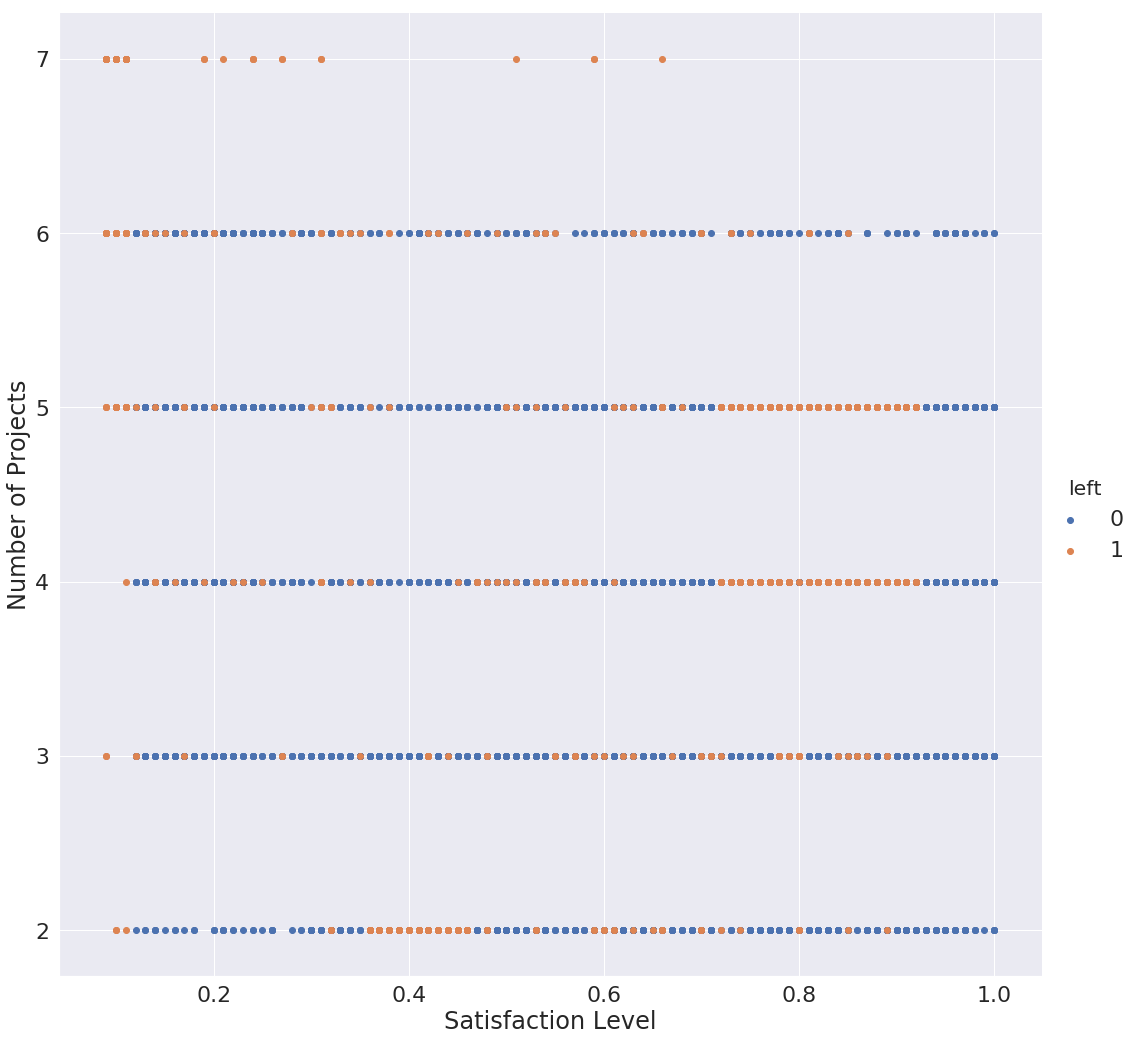

In [7]:
left=df['left'].values
satisfaction = df['satisfaction_level'].values
project = df['number_project'].values

sns.set_style("whitegrid");
sns.set(font_scale=2)
ax = sns.FacetGrid(df, hue="left", height=15) \
   .map(plt.scatter, "satisfaction_level", "number_project") \
   .add_legend();
ax.set(xlabel='Satisfaction Level', ylabel='Number of Projects')

plt.show();


# Part 5 : Plot Data ( Training and Validation Error wrt Depth and Nodes ) <br>

In [8]:
# loading the data in a dataframe
file = 'train.csv'
df = pd.read_csv(file)
x = np.unique(df['left'], return_counts = True)
c_list = ['satisfaction_level','last_evaluation','number_project','average_montly_hours',
          'time_spend_company','Work_accident','promotion_last_5years','sales','salary','left']
df1 = df[c_list]

train_set = df1.sample(frac=0.8,random_state=200)
validate_set = df1.drop(train_set.index)
x = np.unique(train_set['left'], return_counts = True)
c_list.remove('left')

# ---------------------------------------------------------------------------------

def entropy_(df):
    total = df['left'].count()
    positive = df[df['left'] == 1]
    pos_c = positive['left'].count()
    neg_c = total - pos_c
    if pos_c == 0 or neg_c == 0 :
        return 0
    ent = - (pos_c/total * math.log(pos_c/total,2) 
                 + neg_c/total * math.log(neg_c/total,2))
    return ent
    
# ---------------------------------------------------------------------------------

def IG(data,attribute,entropy):
    isum = 0
    t = len(data.index)
    label = (data[attribute].unique()).tolist()
    for i in label:
        sdf = data[data[attribute] == i]
        isum = isum + ((len(sdf.index)/t) * entropy_(sdf))
    return entropy - isum
# ---------------------------------------------------------------------------------
# best attribute

def best_attribute(df,attribute):
    e = entropy_(df)
    attribute_list = {}
    for best in attribute :
        attribute_list[best] = IG(df , best , e)
    b = max(attribute_list, key=attribute_list.get)
    return b
# ---------------------------------------------------------------------------------

numeric_data = ['satisfaction_level','last_evaluation','number_project',
                'average_montly_hours','time_spend_company']
attribute_dict = {}
# --------------------------------------------------------------------------------- 
# Preprocess the numeric data accordingly

def convert(df,attr):
    mapp = {}
    check = []
    avg = []
    label = 0
    llist = []
    sortd = df.sort_values(attr)
    uv = sortd[attr].unique().tolist()
    for i in uv:
        temp = sortd[sortd[attr] == i]
        mapp[i] = np.unique(temp['left'])[np.argmax(np.unique(temp['left'],return_counts=True)[1])]
        
    prev = uv[0]
    h = mapp[uv[0]]
    for i in uv[1:len(uv)]:
        if mapp[i] == h:
            prev =i
            continue
        else :
            h = 1-h
            check.append(prev)
            prev = i
            check.append(i)
    for i in range(0,len(check),2):
        avg.append((check[i]+check[i+1])/2)
    attribute_dict[attr] = avg
    for i in df.index:
        attv = df.loc[i,attr]
        label = 0
        f = 0
        for a in avg:
            if attv < a:
                f = 1
                llist.append(label)
                break
            else :
                label += 1
        if f == 0:
            llist.append(label)
    
    df = df.drop(attr,axis=1)           ##
    new1 = pd.Series(llist)              ##
    df[attr] = new1.values
    return df
# --------------------------------------------------------------------------------- 

def tree(df , attribute_list , pd , root=None):
    if len(np.unique(df['left'])) <=1 :
        return {'predict': np.unique(df['left'])[0]}
    elif len(attribute_list) == 0:
        t = np.argmax(np.unique(df['left'], return_counts = True)[1])
        return {'predict': np.unique(df['left'])[t]}
    elif len(df) == 0:
        t = np.argmax(np.unique(pd['left'], return_counts = True)[1])
        return {'predict': np.unique(pd['left'])[t]}
    b = best_attribute(df,attribute_list[:])
    attribute_list.remove(b)
    # tree empty
    if root is None:
        root = {}
        t = np.argmax(np.unique(df['left'], return_counts = True)[1])
        root['default'] = np.unique(df['left'])[t]
        root[b] = {}
    for i in df[b].unique():
        new_df = df[df[b]==i]
        root[b][i] = tree( new_df , attribute_list[:] , df)
    return root
# print (c_list)
# --------------------------------------------------------------------------------- 
# BUILD TREE
# --------------------------------------------------------------------------------- 

# Assign the train set on the new data

for i in numeric_data:
    train_set = convert(train_set,i)

# --------------------------------------------------------------------------------- 

# --------------------------------------------------------------------------------- 

def prediction_convert(df,attr):
    avg = attribute_dict[attr]
    label = 0
    llist =[]
    for i in df.index:
        attv = df.loc[i,attr]
        label = 0
        f = 0
        for a in avg:
            if attv < a:
                f = 1
                llist.append(label)
                break
            else :
                label += 1
        if f == 0:
            llist.append(label)
    
    df = df.drop(attr,axis=1)           ##
    new1 = pd.Series(llist)              ##
    df[attr] = new1.values
    return df


# --------------------------------------------------------------------------------- 

def final_prediction_list():
    prediction_list= OrderedDict()
    tp,fp,tn,fn = 0,0,0,0
    for i in range(len(actual)):
        if prediction[i] == actual[i]:
            if prediction[i] == 1:
                tp += 1
            elif prediction[i] == 0:
                tn += 1
        else:
            if actual[i] == 1:
                fn += 1
            elif actual[i] == 0:
                fp += 1
    prediction_list['True Positive'] = tp
    prediction_list['False Positive'] = fp
    prediction_list['True Negative'] = tn
    prediction_list['False Negative'] = fn
    accuracy = (tp+tn)/len(actual)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = 2/(1/recall + 1/precision)
    prediction_list['Accuracy'] = accuracy
    prediction_list['Precision'] = precision
    prediction_list['Recall'] = recall
    prediction_list['F1_Score'] = f1_score
    pp = pprint.PrettyPrinter(indent=6)
    for i, (key, value) in enumerate(prediction_list.items()):
        print(key + ":: ", value)
        print("")
        
# --------------------------------------------------------------------------------- 

root = tree(train_set,c_list[:],train_set)

# --------------------------------------------------------------------------------- 
# Assign the validate set on the new data

for i in numeric_data:
    validate_set = prediction_convert(validate_set,i)
# ---------------------------------------------------------------------------------

# for i in numeric_data:
#     test_set = convert(test_set,i)

# ---------------------------------------------------------------------------------


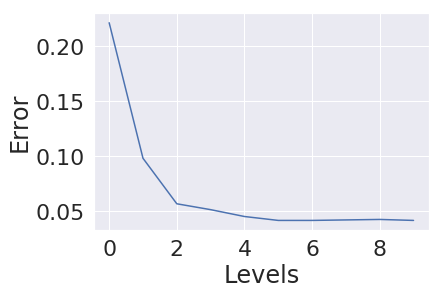

In [9]:
depth_prediction = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

def updated_prediction(predictions, actual):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(actual)):
        if actual[i] == predictions[i] and actual[i] == 1:
            tp += 1
        elif actual[i] == predictions[i] and actual[i] == 0:
            tn += 1
        elif actual[i] != predictions[i] and actual[i] == 0:
            fp += 1
        else:
            fn += 1
    accuracy = (tn + tp)/(tn + tp + fp + fn)  
    return 1-accuracy


def prediction_util(query, root, current_depth, max_depth):
    try:
        if list(root.keys())[0] == 'predict':
            depth_prediction[max_depth].append(root['predict'])
            return
        if list(root.keys())[0] == 'default':
            val = query[list(root.keys())[1]]
            next = list(root.keys())[1]
        else:
            val = query[list(root.keys())[0]]
            next = list(root.keys())[0]
        if(current_depth == max_depth):
            depth_prediction[current_depth].append(root['default'])
            return
        prediction_util(query, root[next][val], current_depth + 1, max_depth)
    except:
        depth_prediction[max_depth].append(0)

def predict_depth(root, data, max_depth):
    for index, row in data.iterrows():
        prediction_util(row, root, 0, max_depth)
        
        

for i in range(10):
    predict_depth(root, validate_set, i)

error = []
target = validate_set['left'].tolist()
for i in range(10):
    error.append(updated_prediction(depth_prediction[i], target))

li = [0,1,2,3,4,5,6,7,8,9]
df_plot1 = pd.DataFrame({'Error':error})
df_plot2= pd.DataFrame({'Levels':li})
df_plot = df_plot1.join(df_plot2)
ax = sns.lineplot(x="Levels", y="Error", data=df_plot)

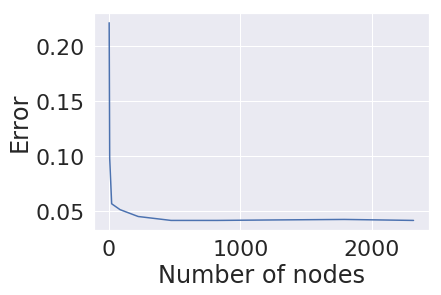

In [10]:
def num_of_nodes(tree,depth,cur_depth,list_num_nodes):
    if cur_depth==depth:
        list_num_nodes[depth]=list_num_nodes[depth]+1
    elif cur_depth<depth:
        for key in tree.keys():
            if key == 'predict':
                list_num_nodes[depth]=list_num_nodes[depth]+1
            elif key != 'default':
                for val in tree[key]:
                    num_of_nodes(tree[key][val],depth,cur_depth+1,list_num_nodes)
list_num_nodes=[]                
for i in range(10):        
    list_num_nodes.append(0)
    num_of_nodes(root,i,0,list_num_nodes)
for i in range(1,10):
    list_num_nodes[i]=list_num_nodes[i-1] + list_num_nodes[i]

df_plot3 = pd.DataFrame({'Number of nodes':list_num_nodes})
df_plot = df_plot.join(df_plot3)
ax = sns.lineplot(x="Number of nodes", y="Error", data=df_plot)


# Part 6 : Explain how decision tree is suitable handle missing values<br>

There are several methods used by Decision Tress. Some of them are discussed below :
<ol><li><b>Handling Misssing data at Training </b><br>
<ul>
    <li>Ignoring the entire missing value row.<br>
        This is a possible solution. Simply , ignoring the entire row of data where we have a NaN seems programatically simpler approach and for some data sets will not be a major problem in terms of accuracy and prediction. Though this approach may not be feasible always. Missing Data is a real-world problem and may be dealt in a better way.
    </li><br>
    <li>If there are many missing values in the entire feature, ignoring the feature overall will lead to better results and will save time. This also 
    </li><br>
    <li>One common strategy is to assign it the value that is most common among training examples at that point.
    </li><br>
    <li>Imputation:The basic strategy is to estimate a value at the point.<br>
        One complex and computationally expensive method may be to assign a probablity (p) to each of possible values rather than simply assigning the most common value (average as discussed above).<br>
        These can be estimated again based on observed frequency of the occuring value in the training.
    </li></ul><br>
    </li><br>
    <li><b>Handling Misssing data at Testing </b><br>
    <ul><li> Ignoring is always an option</li><br>
    <li>Most Common Attribute Value</li><br>
    <li>Prediction of the value </li><br>
    </ul>
    </ol>